# \[TS\] CH02. 실습1(추세모형)

김보람  
2023-09-30

> 해당 자료는 전북대학교 이영미 교수님 2023고급시계열분석 자료임

# 패키지 설치

In [12]:
library(lmtest) # Dw test
library(ggplot2)
library(lubridate)  # 날짜 다루는 패키지

In [13]:
options(repr.plot.width = 15, repr.plot.height = 8)

# 국내총인구

In [14]:
z <- scan("population.txt")
head(z)

In [16]:
pop = round(z/10000)
head(pop)

In [17]:
tmp.data <- data.frame(
 day = seq(ymd("1960-01-01"),by='year', length.out=length(z)),  #60년 1월 1일부터 연단위로, 데이터길이는 z와 동일하게.
 #day = 1959 + 1:length(z),
 pop = round(z/10000),
 t = 1:length(z),
 t2 = (1:length(z))^2
)
head(tmp.data)

# 시도표그리기

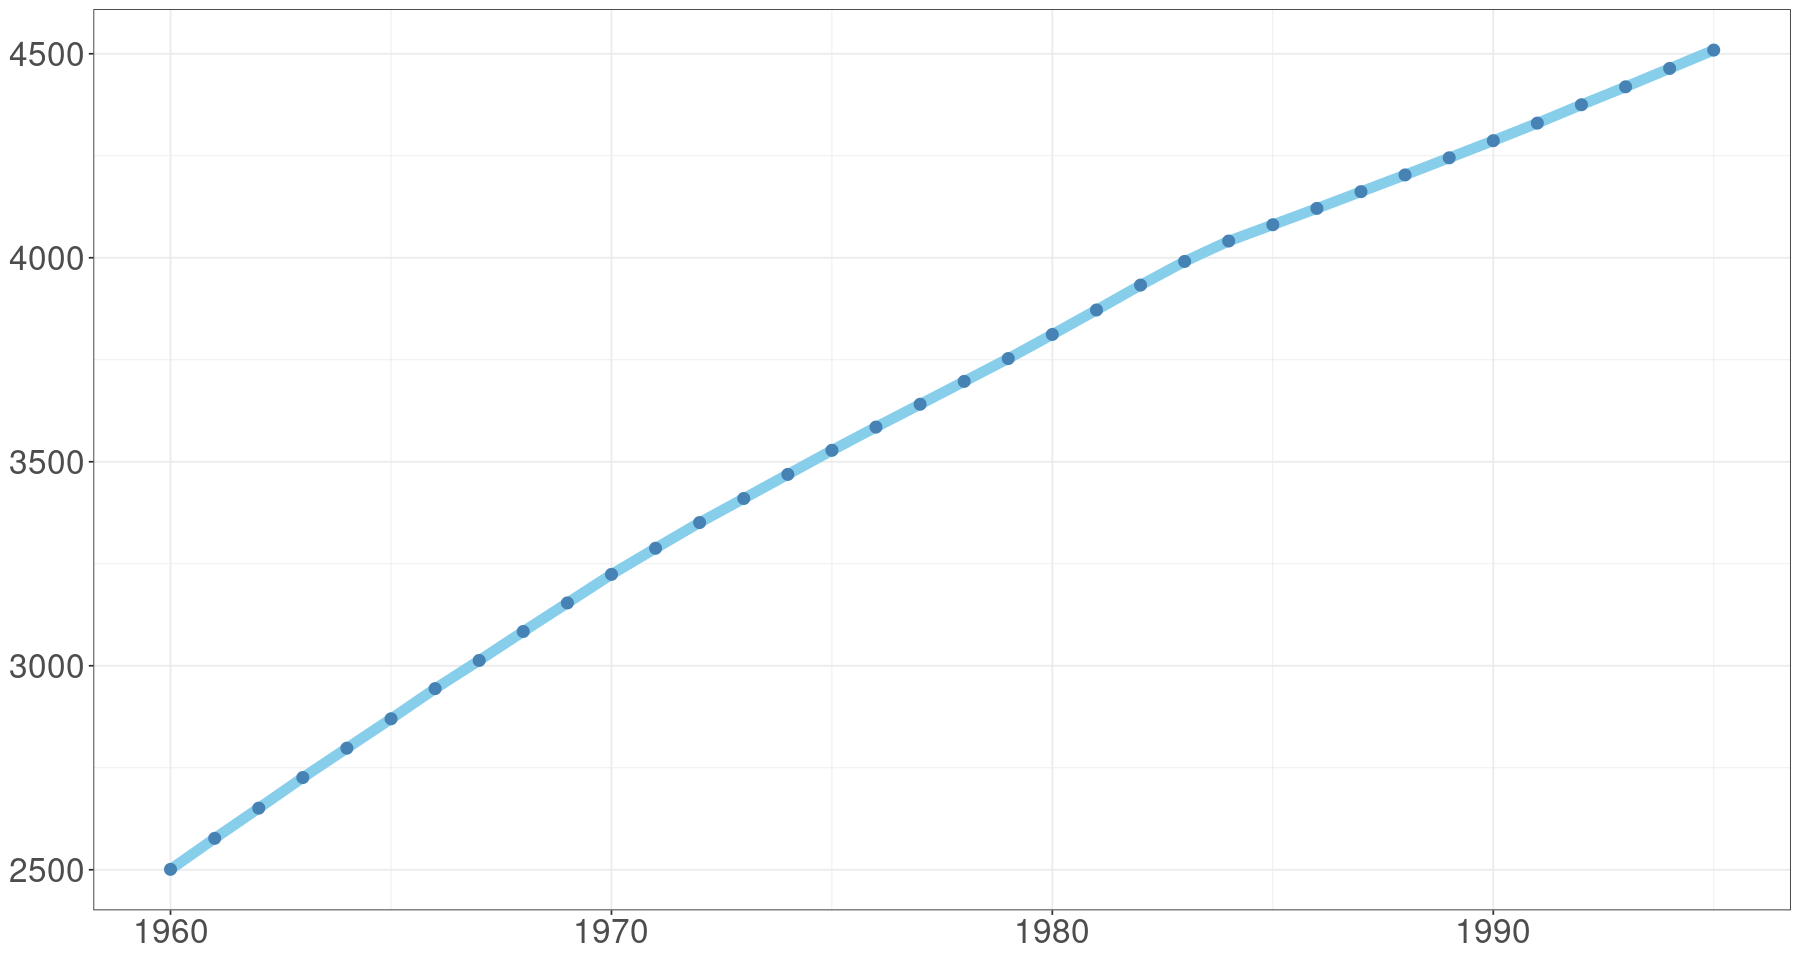

In [18]:
ggplot(tmp.data, aes(day, pop)) +
 geom_line(col='skyblue', lwd=3) +
 geom_point(col='steelblue', cex=3)+
 theme_bw() +
 #scale_x_date(date_labels = "%Y-%m") +
 theme(axis.title=element_blank(),    # ggplot 배경 변경
 axis.text= element_text(size=20))

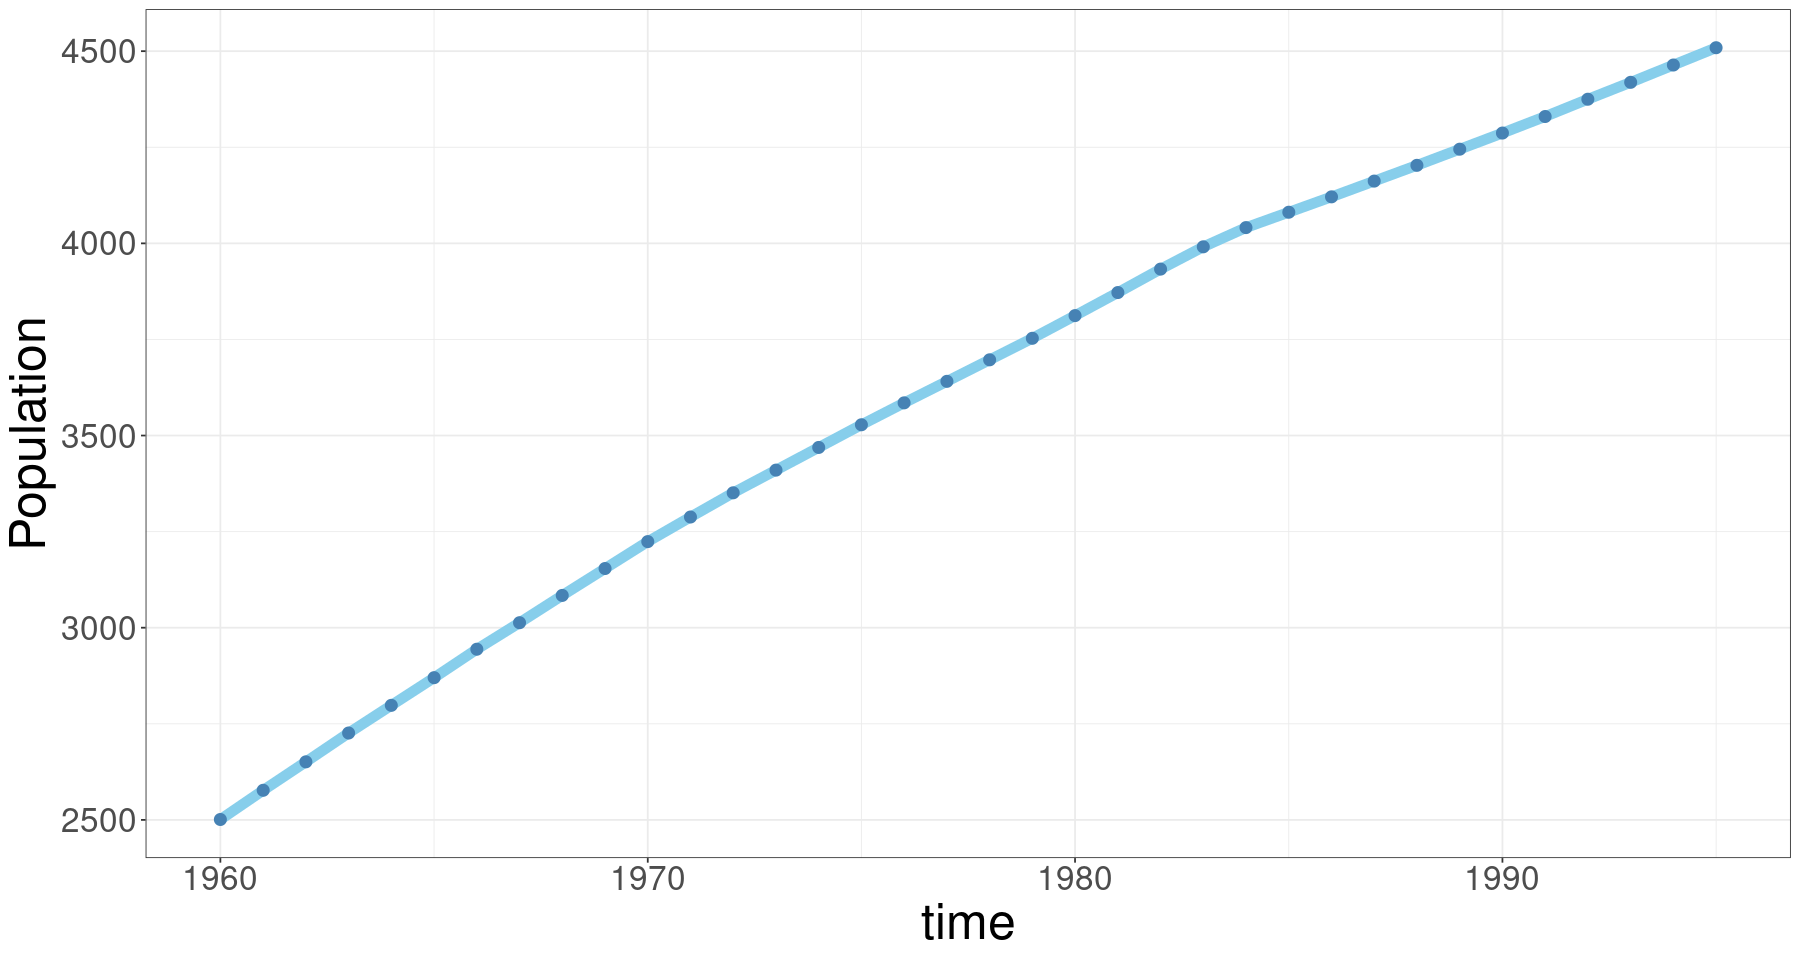

In [19]:
ggplot(tmp.data, aes(day, pop)) +
 geom_line(col='skyblue', lwd=3) +
 geom_point(col='steelblue', cex=3)+
 xlab("time") + ylab("Population")+
 theme_bw() +
 #scale_x_date(date_labels = "%Y-%m") +
 theme(axis.text= element_text(size=20),
 axis.title= element_text(size=30))

# 1차 선형 추세 모형

$$\text{모형}: Z_t = \beta_0 + \beta_1 t + \epsilon_t, t=1,\dots, n$$

In [20]:
m1 <- lm(pop~t, data=tmp.data)
summary(m1)


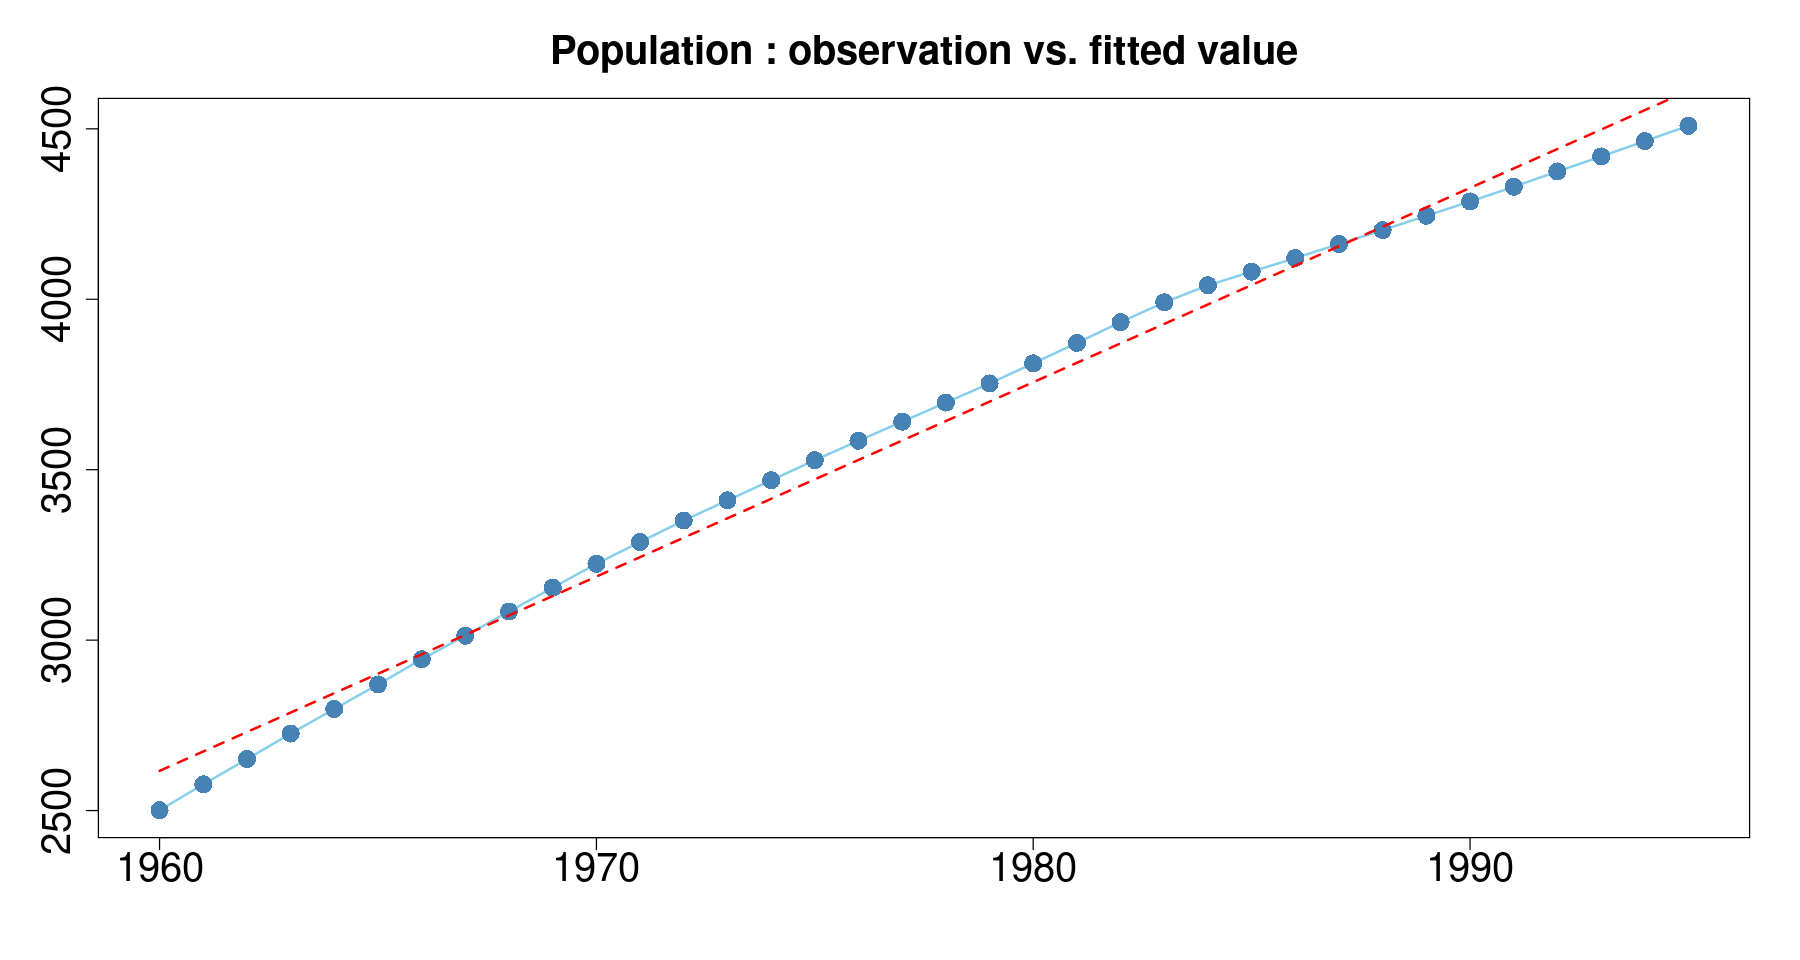

In [21]:
plot(pop~day, tmp.data,
 main = 'Population : observation vs. fitted value',
 xlab="", ylab="",
 type='l',
 col='skyblue',
 lwd=2, cex.axis=2, cex.main=2) +
 points(pop~day, tmp.data, col="steelblue", cex=2, pch=16) +
 lines(tmp.data$day, fitted(m1), col='red', lty=2, lwd=2)


## 잔차분석

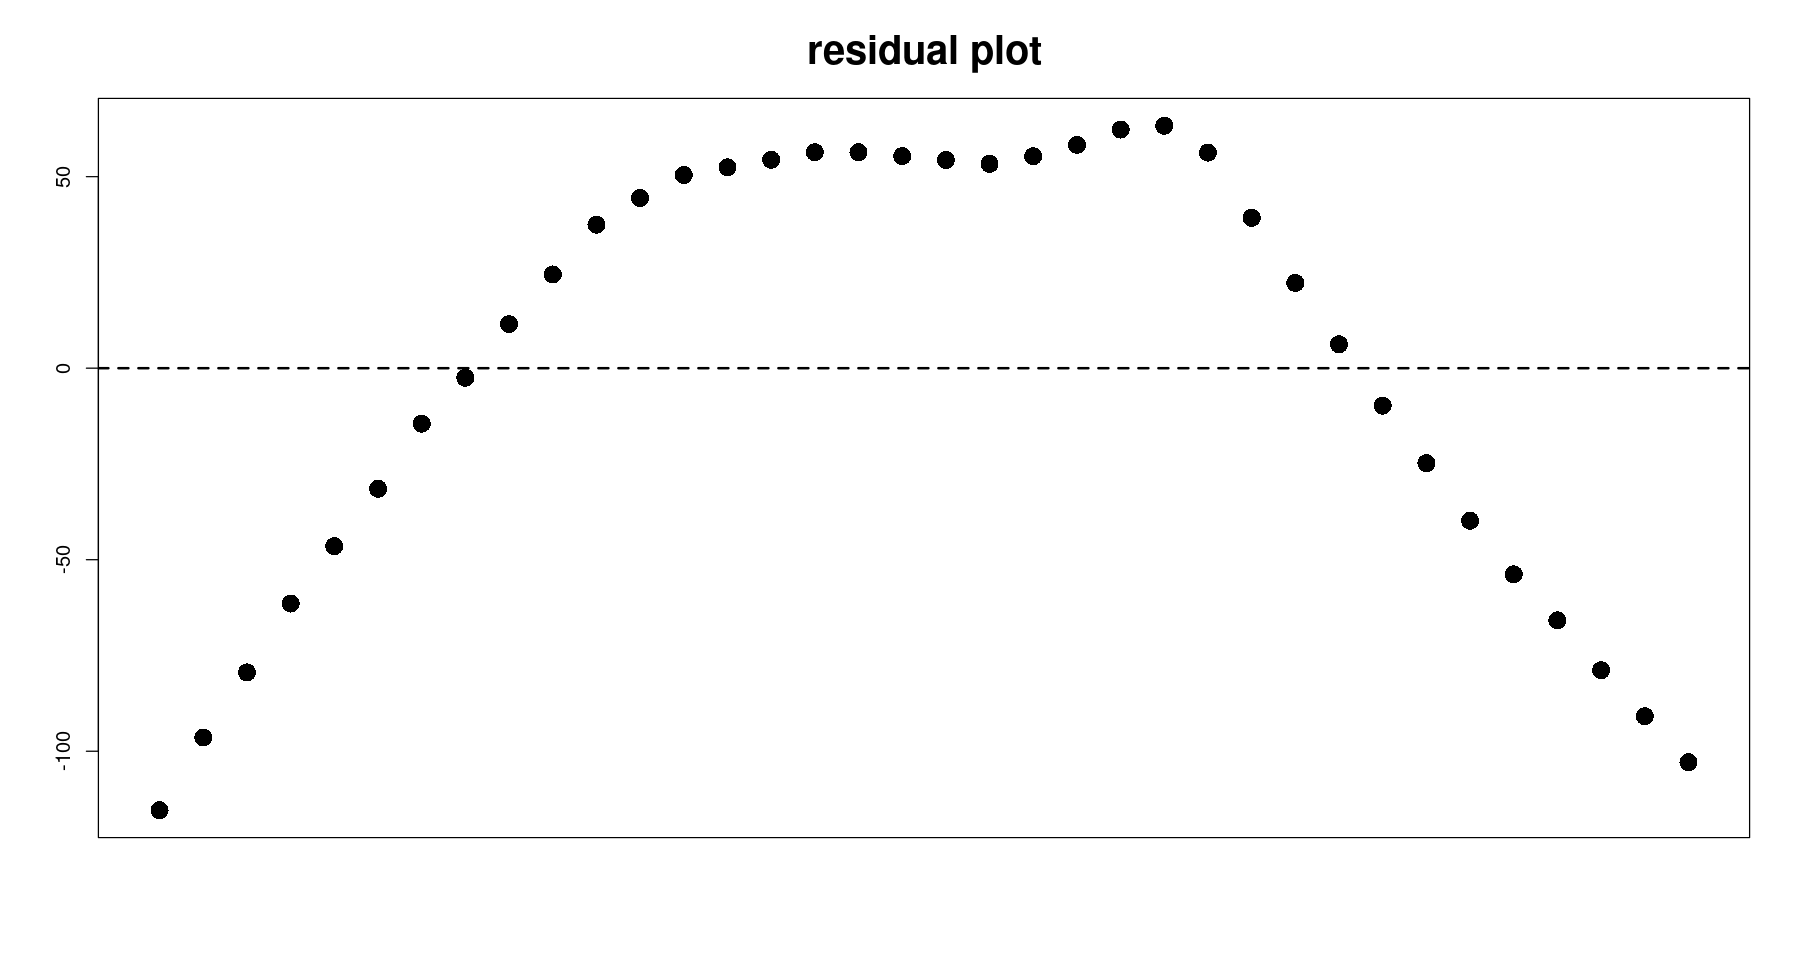

In [22]:
plot(tmp.data$day, resid(m1),
     pch=16, cex=2, xaxt='n',
     xlab="", ylab="", main="residual plot", cex.main=2)
abline(h=0, lty=2, lwd=2)


## 독립성검정(DW test)

In [23]:
dwtest(m1)

-   아무 옵션이 없으면 0보다 크냐는게 기본!! 대립가설확인필요

In [24]:
dwtest(m1, alternative="two.sided")

-   양측검정

In [25]:
dwtest(m1, alternative="less")

## 정규분포 검정(shapro-wilk test)

`-` 가설

$H_0$: 정규분포를 따른다. VS $H_1$: 정규분포를 따르지 않는다.

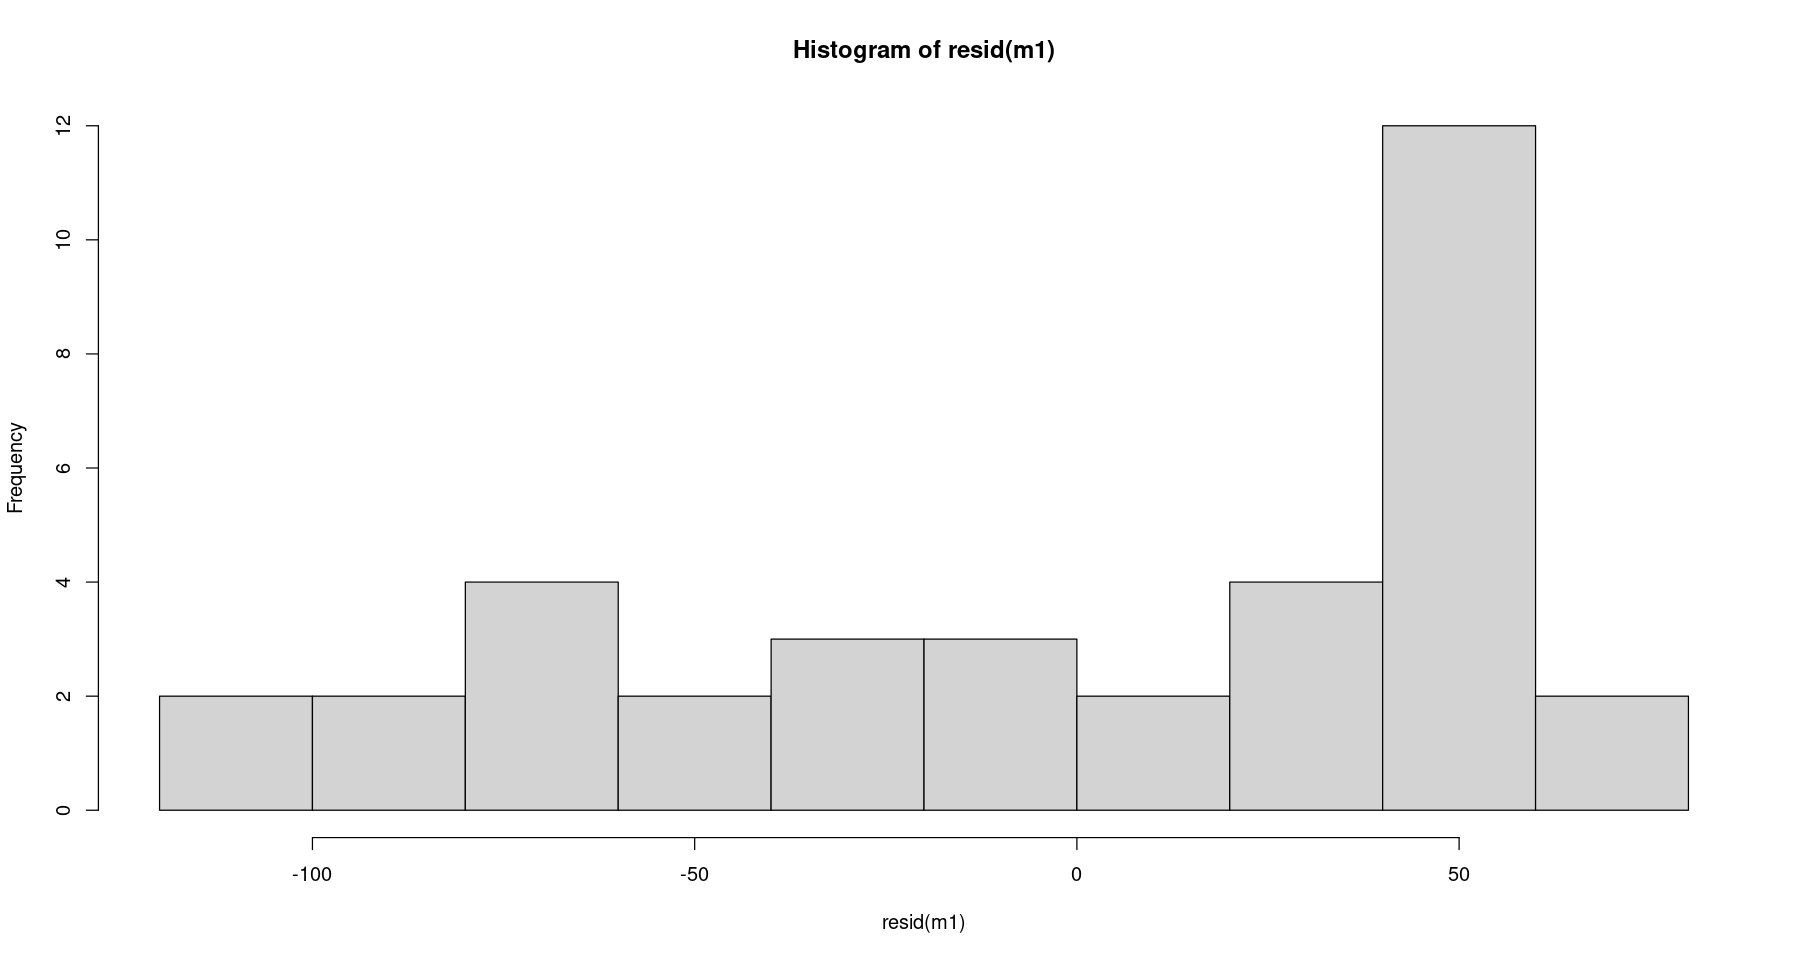

In [26]:
hist(resid(m1))


-   왼쪽으로 치우쳐져 있는 그림. 정규분포가 아닐거 같다.

In [27]:
shapiro.test(resid(m1)) #H_0 : 정규분포를 따른다.


## 등분산성검정(Breusch–Pagan test)

`-` 가설

$H_0$: 등분산 VS $H_1$: 이분산

In [29]:
bptest(m1)


-   잔차에 대한 bptest를 한다. 위에 shapiro는 resid(m1)해줬지만 bptest는
    그냥 바로 넣어 주면 된다.

-   pvalue값이 엄청 커서 기각 못함. 즉 등분산이다.

# 2차 선형 추세

$$\text{모형}: Z_t = \beta_0 + \beta_1 t + \beta_2 t^2 + \epsilon_t, t=1,\dots, n$$

In [30]:
m2 <- lm(pop~t+t2, data=tmp.data)
summary(m2)


-   t2말고 $I(t^2)$으로 작성해줘도 된다. 대신 $t^2$으로 하게 되면 오류가
    나니까 I지시함수 꼭 써주기

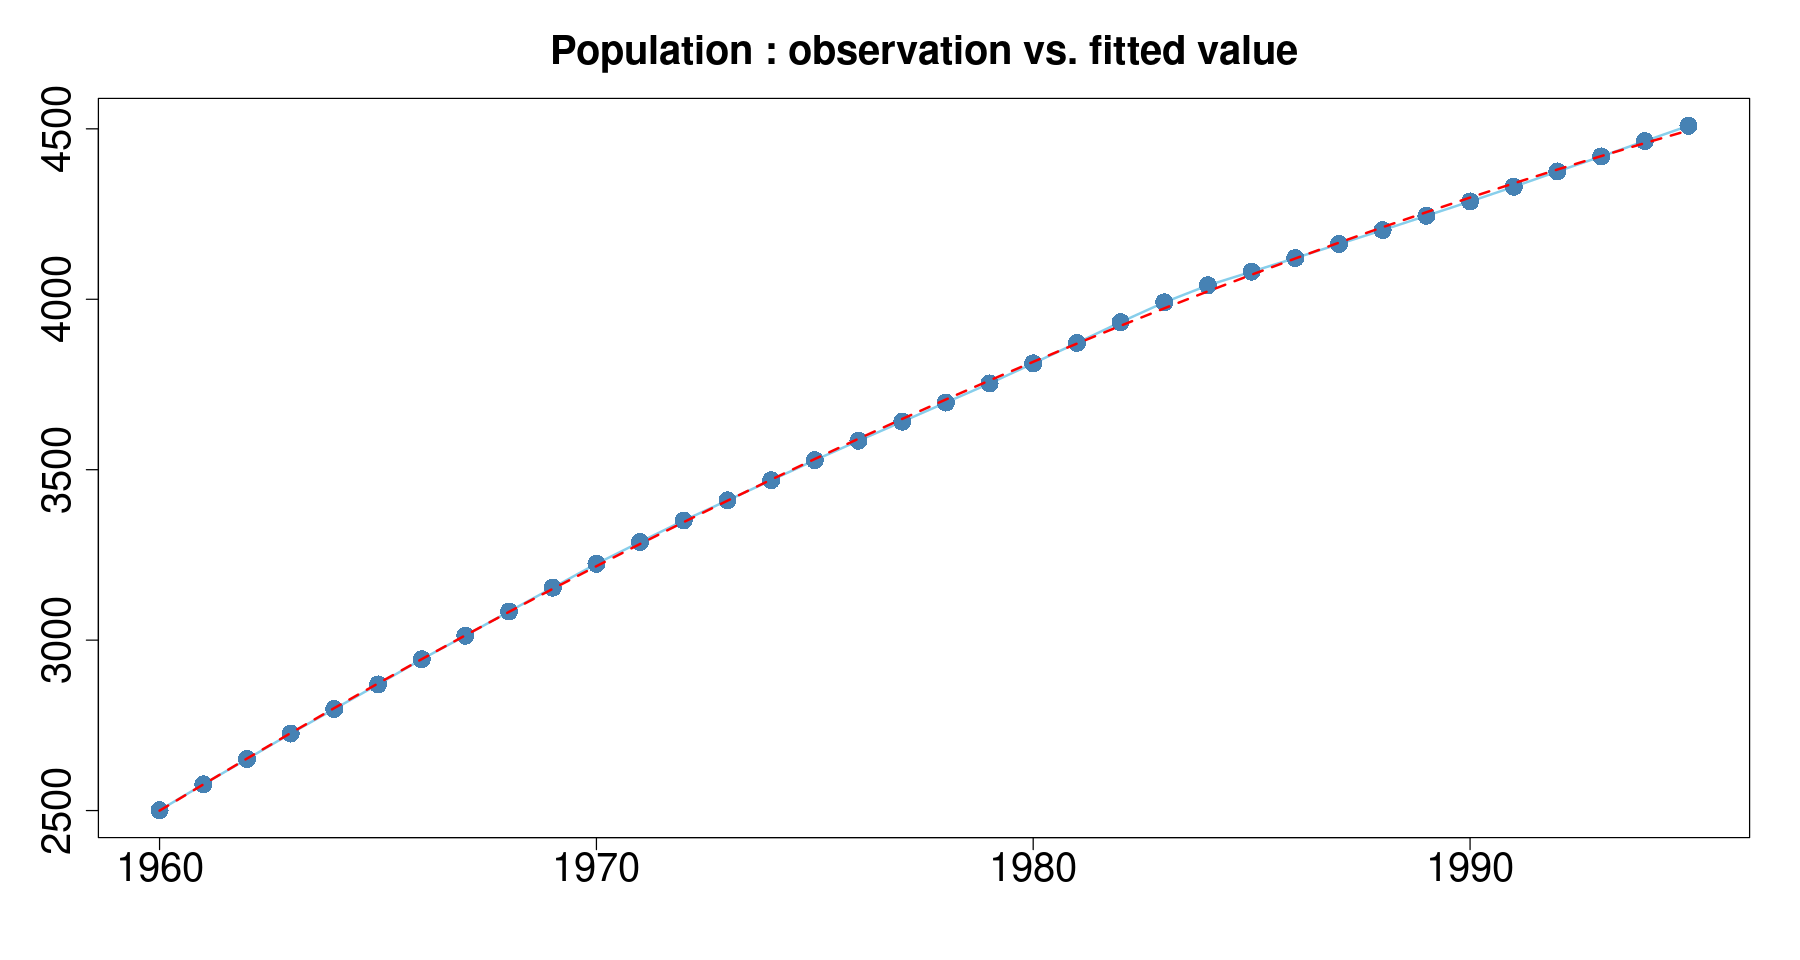

In [31]:
plot(pop~day, tmp.data,
 main = 'Population : observation vs. fitted value',
 xlab="", ylab="",
 type='l',
 col='skyblue',
 lwd=2, cex.axis=2, cex.main=2) +
 points(pop~day, tmp.data, col="steelblue", cex=2, pch=16) +
 lines(tmp.data$day, fitted(m2), col='red', lty=2, lwd=2)

## 잔차분석

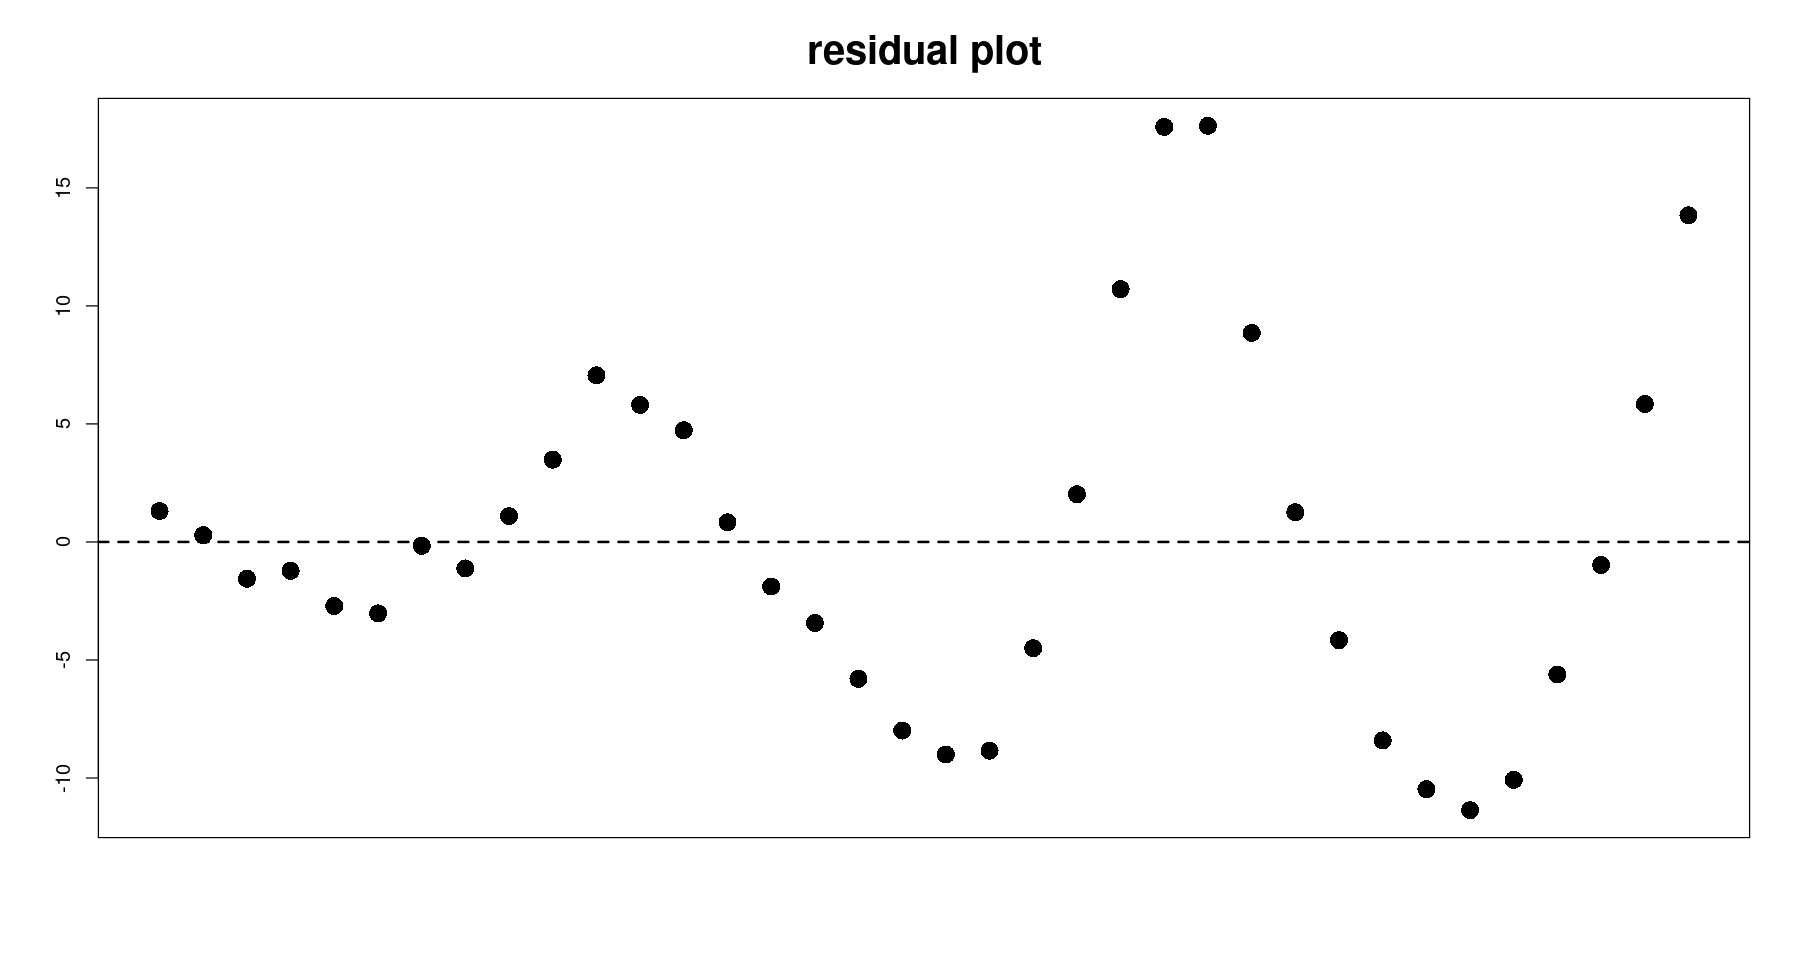

In [32]:
plot(tmp.data$day, resid(m2),
 pch=16, cex=2, xaxt='n',
 xlab="", ylab="", main="residual plot", cex.main=2)
abline(h=0, lty=2, lwd=2)


## 독립성 검정(DW test)

In [33]:
dwtest(m2,alternative = "two.sided")

In [34]:
dwtest(m2,alternative = "greater")


## 정규성 검정

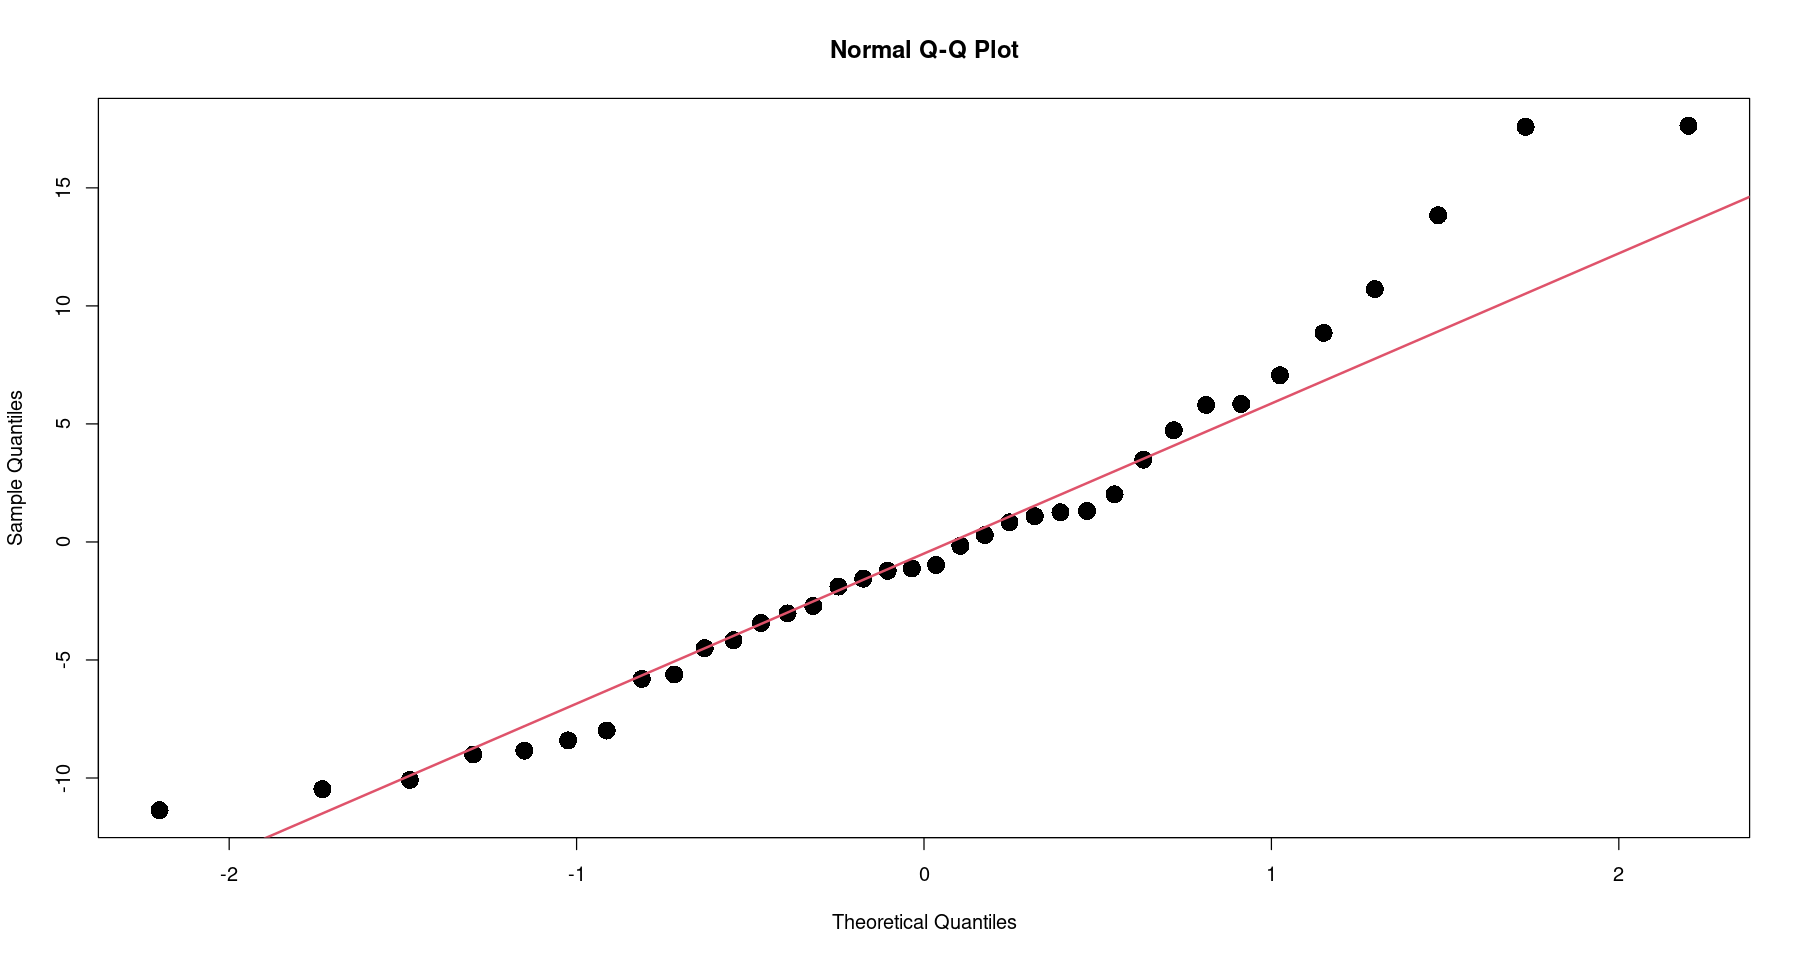

In [35]:
qqnorm(resid(m2), pch=16, cex=2)
qqline(resid(m2), col = 2, lwd=2)


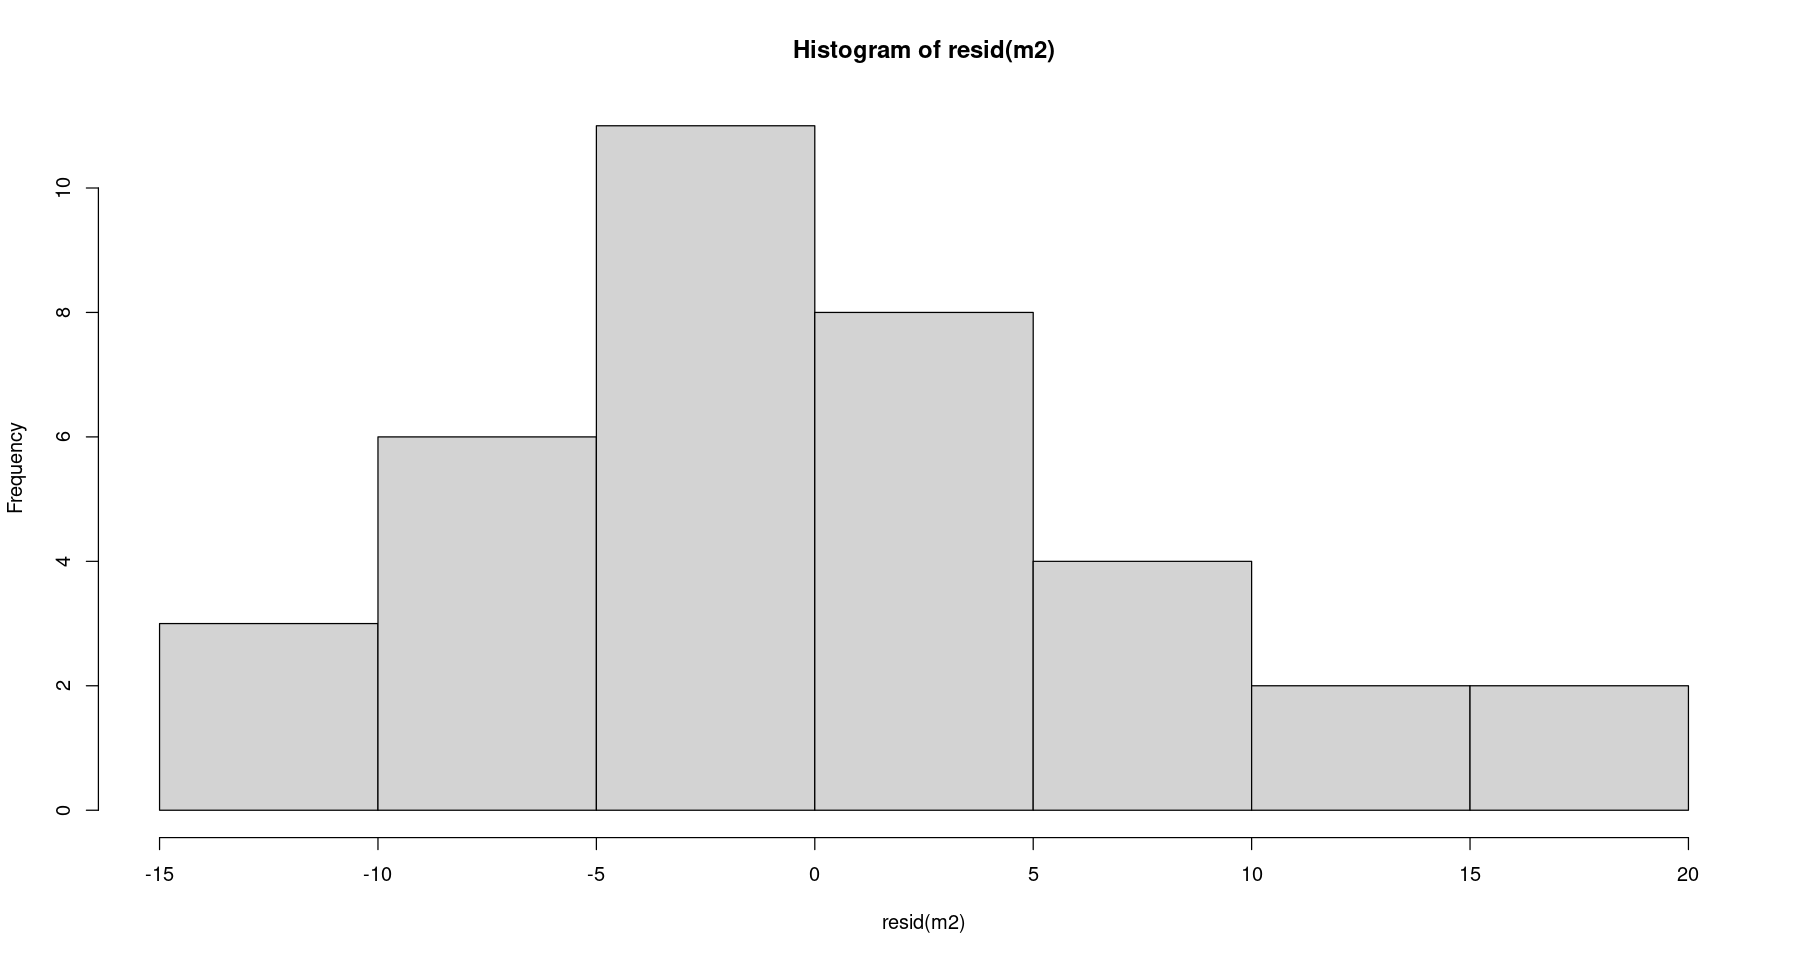

In [36]:
hist(resid(m2))

In [37]:
shapiro.test(resid(m2)) ##shapiro-wilk test

## 등분산성 검정

In [38]:
bptest(m2)

-   이분산성이다.

# 로그변환 후 2차 추세

$$\text{모형}: ln(Z_t) = \beta_0 + \beta_1 t + \beta_2 t^2 + \epsilon_t, t=1,\dots, n$$

In [39]:
m3 <- lm(log(pop)~t+t2, data=tmp.data)
summary(m3)

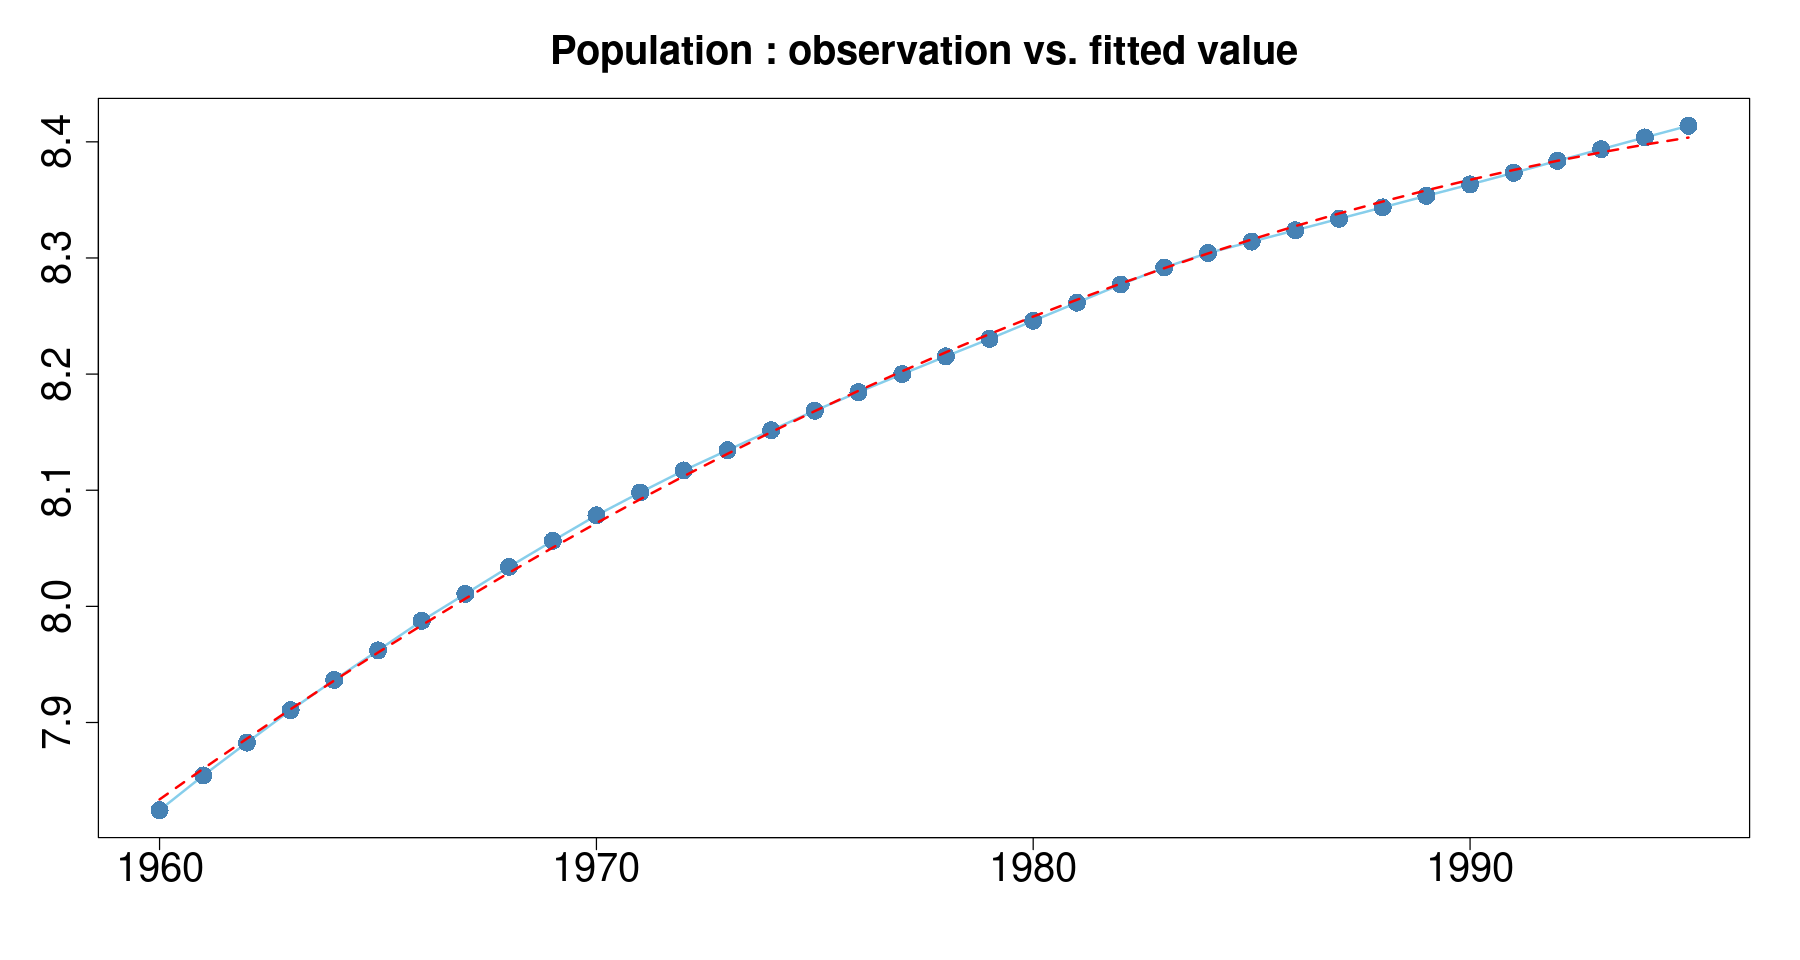

In [40]:
plot(log(pop)~day, tmp.data,
 main = 'Population : observation vs. fitted value',
 xlab="", ylab="",
 type='l',
 col='skyblue',
 lwd=2, cex.axis=2, cex.main=2) +
 points(log(pop)~day, tmp.data, col="steelblue", cex=2, pch=16) +
 lines(tmp.data$day, fitted(m3), col='red', lty=2, lwd=2)


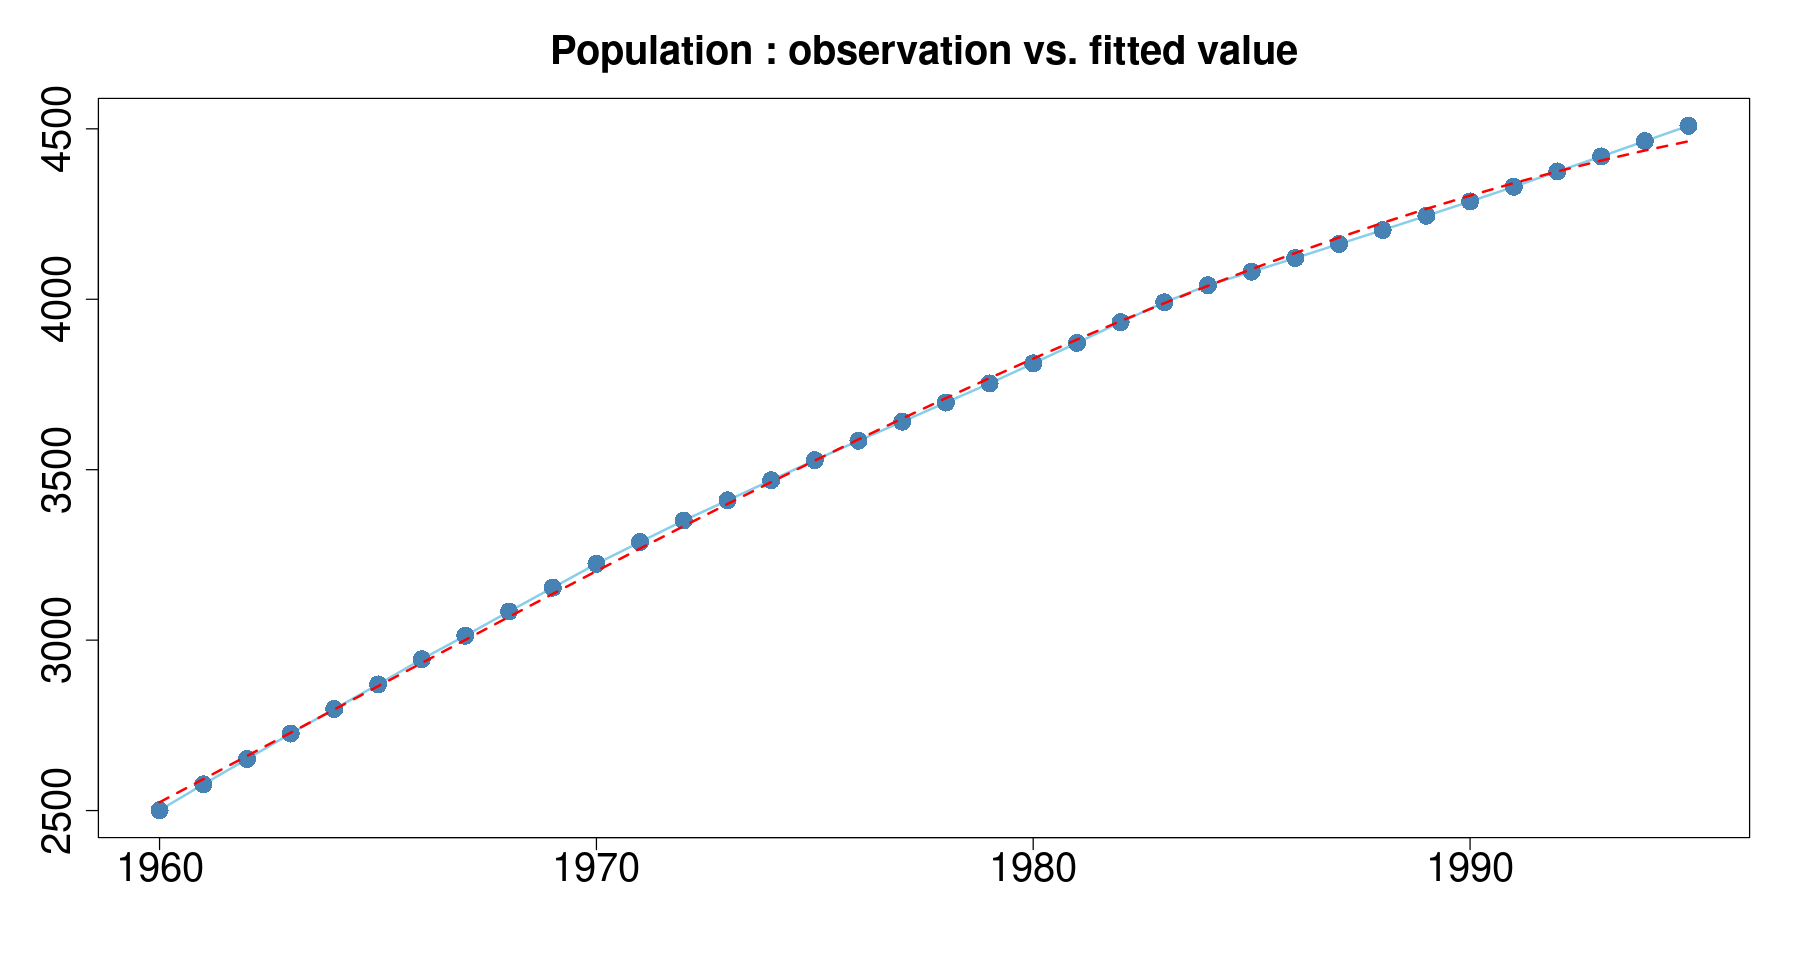

In [41]:
plot(pop~day, tmp.data,
 main = 'Population : observation vs. fitted value',
 xlab="", ylab="",
 type='l',
 col='skyblue',
 lwd=2, cex.axis=2, cex.main=2) +
 points(pop~day, tmp.data, col="steelblue", cex=2, pch=16) +
 lines(tmp.data$day, exp(fitted(m3)), col='red', lty=2, lwd=2)

## 잔차분석

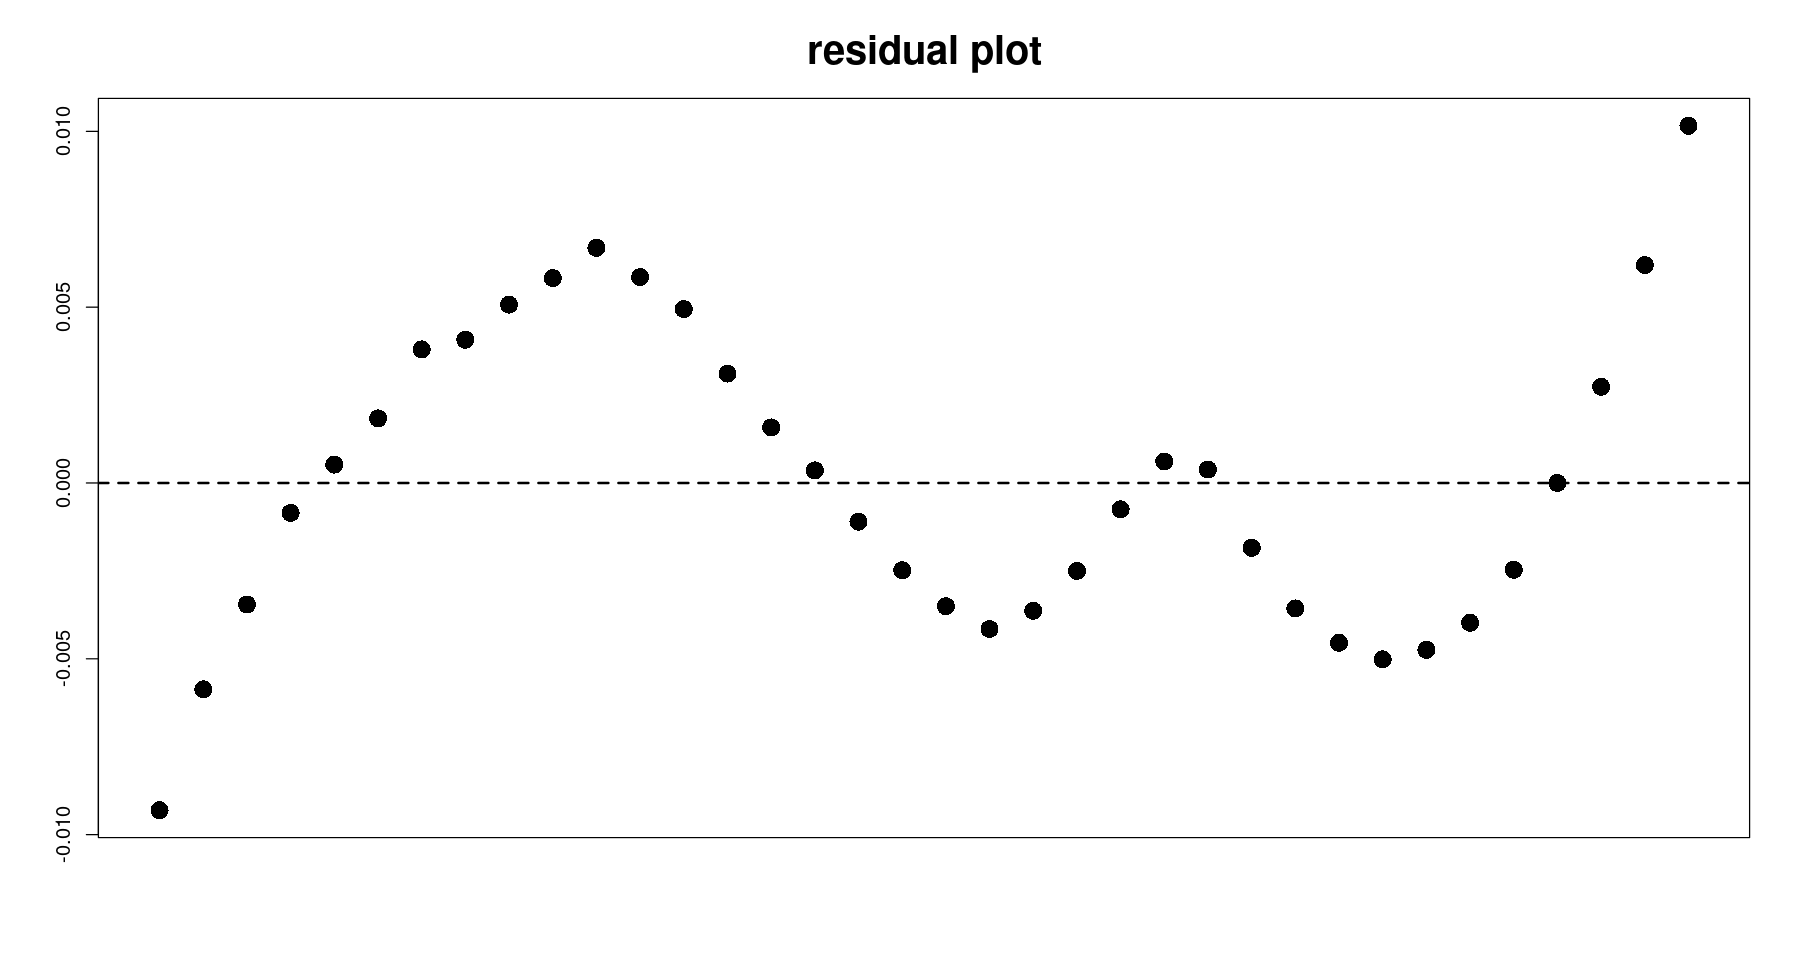

In [42]:
plot(tmp.data$day, resid(m3),
 pch=16, cex=2, xaxt='n',
 xlab="", ylab="", main="residual plot", cex.main=2)
abline(h=0, lty=2, lwd=2)

## 독립성 검정

In [43]:
dwtest(m3,alternative = "two.sided")


In [44]:
dwtest(m3,alternative = "greater")


## 정규성 검정

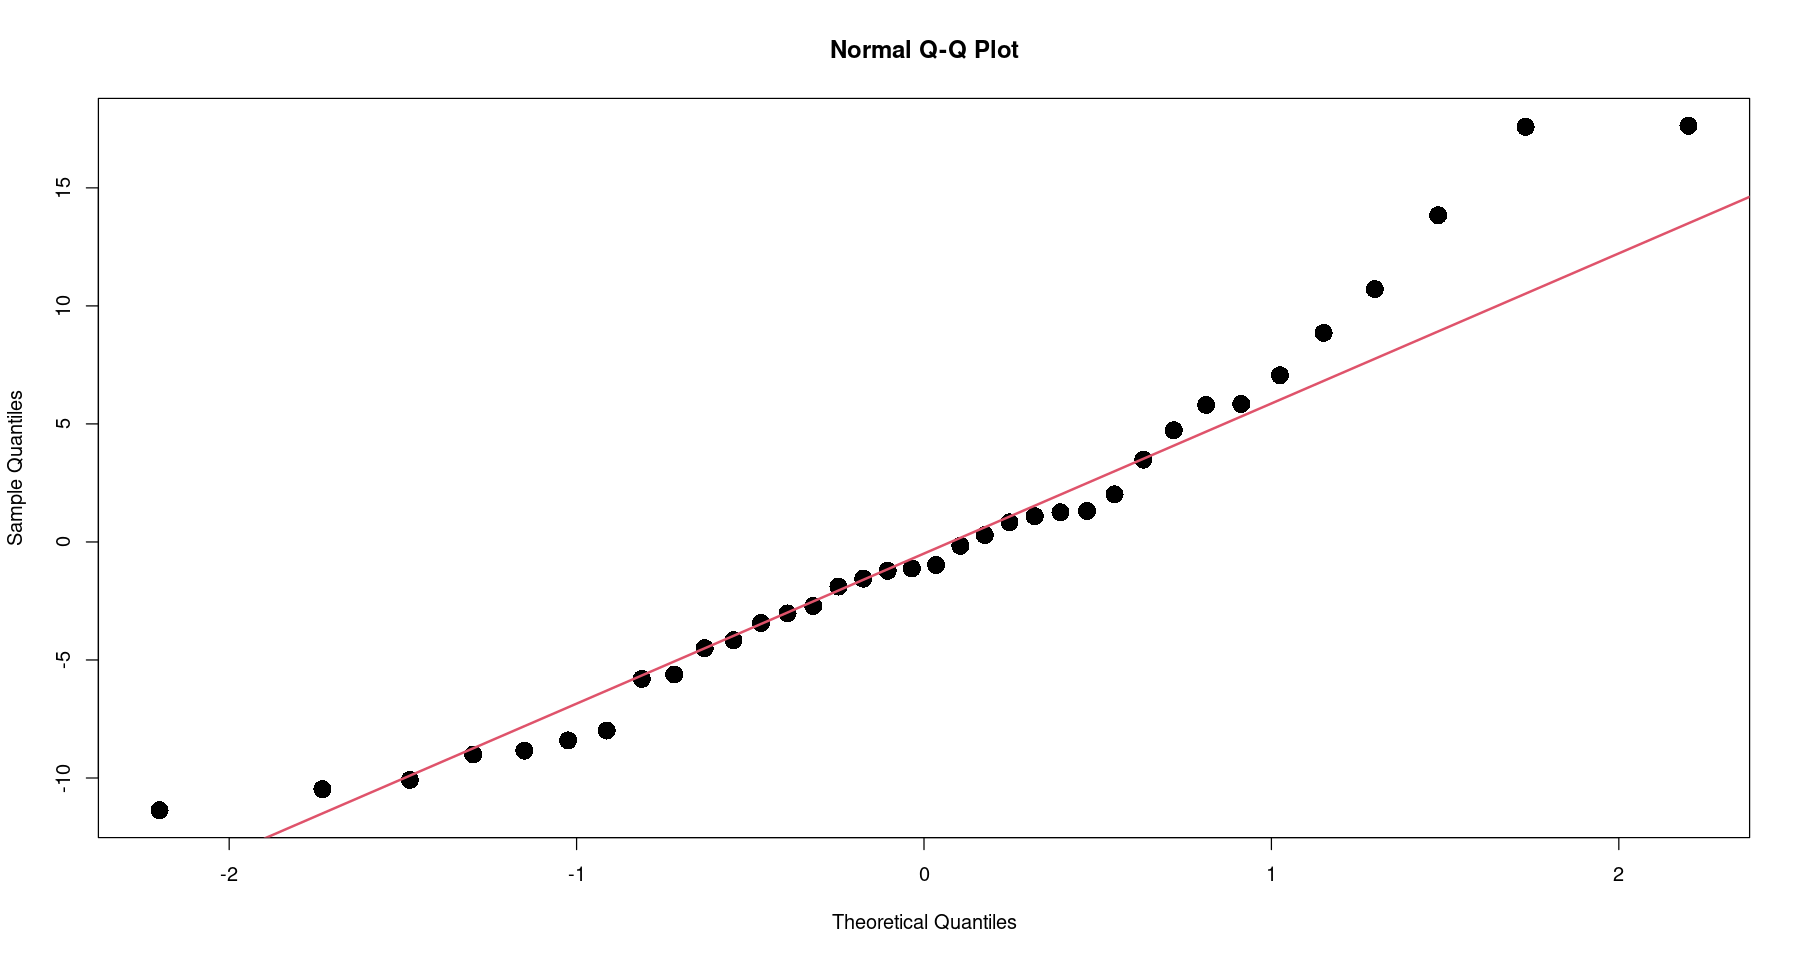

In [45]:
qqnorm(resid(m2), pch=16, cex=2)
qqline(resid(m2), col = 2, lwd=2)


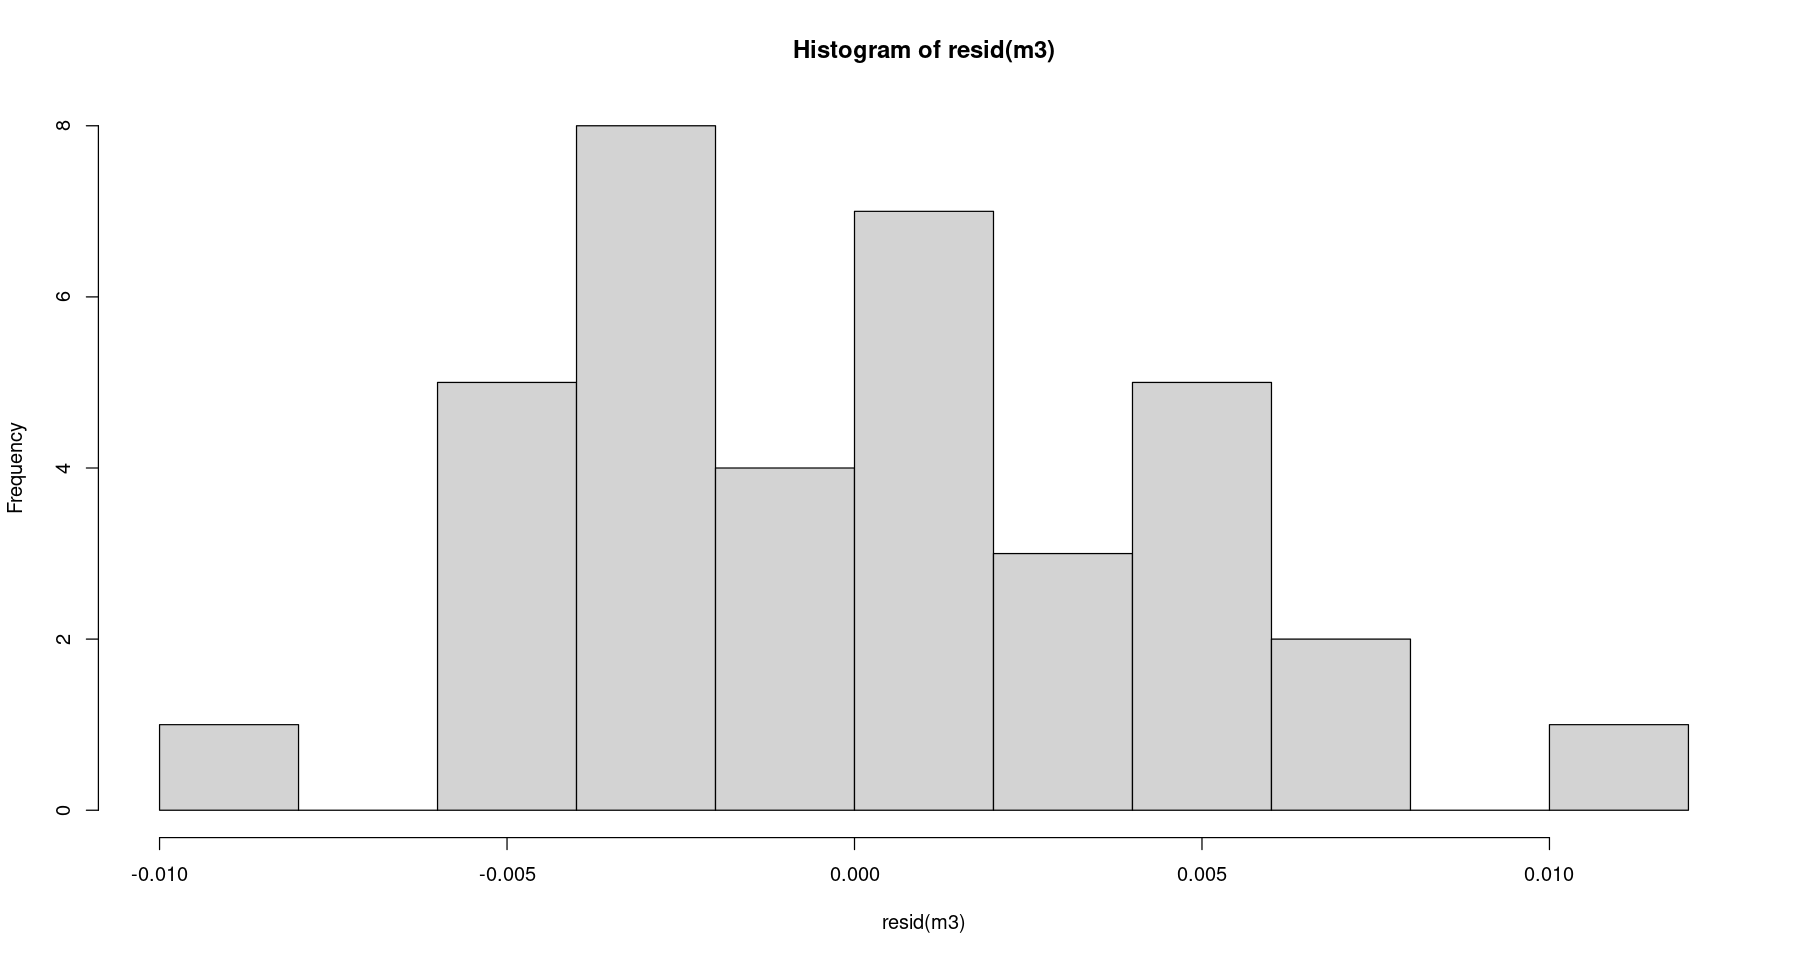

In [46]:
hist(resid(m3))

In [47]:
shapiro.test(resid(m3))

## 등분산성 검정

In [48]:
bptest(m3)
